Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST dataset from keras.datasets

The dataset is already preprocessed and splitted into training and testing data. The dataset returns 4 values which are taken in (X_train,Y_train) , (X_test,Y_test)

In [2]:
(X_train,Y_train), (X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#checking the datatype

type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data=60,000 Images

Testing data=10,000 Images

Image dimension=28 x 28

Grayscale Images=1 channel

In [5]:
#printing 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

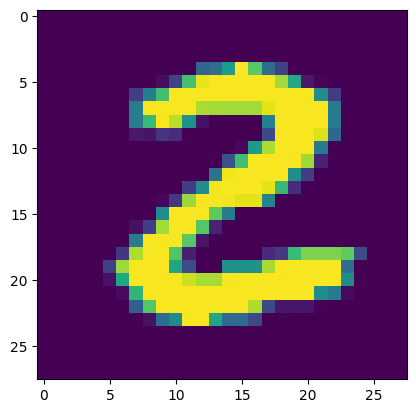

2


In [6]:
#displaying the image

plt.imshow(X_train[25])
plt.show()

#printing the corresponding label

print(Y_train[25])

Image Labels

In [7]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [8]:
#printing unique values in Y_train

print(np.unique(Y_train))

#printing unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Minimum value=0--> 0/255

Maximum value=1--> 255/255

All the other values will be between 0 & 1

In [9]:
#scaling the images

X_train=X_train/255
X_test=X_test/255

Building the Neural Network

In [10]:
#setting up the layers in Neural Network

model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),     #one input layer
                        keras.layers.Dense(50, activation='relu'),     #two hidden layer
                        keras.layers.Dense(50, activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')
])

In [11]:
#compiling the model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Loss = True value- Predicted value

If loss function is high, then model is not working properly

In [12]:
#training the Neural Network

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3022 - accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1416 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0728 - accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0623 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0478 - accuracy: 0.9845
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0408 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

Training data accuracy= 98.9%

Accuracy of Test data

In [13]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9722
0.9721999764442444


Test data accuracy= 97.1%

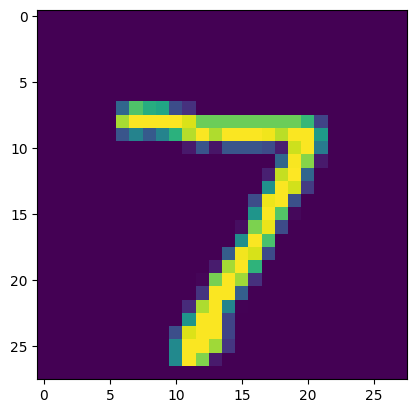

In [14]:
#displaying first data point from Test data

plt.imshow(X_test[0])
plt.show()

In [15]:
print(Y_test[0])

7


In [16]:
#all the 10,000 labels has to be stored

Y_pred=model.predict(X_test)
print(Y_pred[0])

313/313 [==============================] - 1s 2ms/step
[9.1976292e-02 4.1591027e-03 8.7981343e-01 9.9900299e-01 3.6627625e-06
 5.0086802e-01 1.1097225e-09 9.9999976e-01 3.4376398e-01 9.6301246e-01]


The probability of all numbers from 0-9 are displayed and we need to consider that probability which is highest, here in this case for number 7 the value is highest, which is 9.9999774e-01

In [17]:
#converting the prediction to class labels

Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test= True Labels

Y_test_pred= Predicted Labels

Confusion Matrix

In [18]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [19]:
print(conf_mat)

tf.Tensor(
[[ 957    0    2    2    0    7    2    5    3    2]
 [   0 1117    5    1    0    2    1    1    7    1]
 [   2    0  990    9    2    2    0    7   20    0]
 [   0    0    5  983    0    8    0    5    5    4]
 [   2    0    1    1  961    1    4    2    1    9]
 [   1    0    0   12    0  867    1    1    7    3]
 [   1    2    6    1    5   12  921    3    7    0]
 [   0    4    9    2    1    0    0 1005    3    4]
 [   0    0    1    4    3   12    0    2  948    4]
 [   0    3    0    6    9    9    1    7    4  970]], shape=(10, 10), dtype=int32)


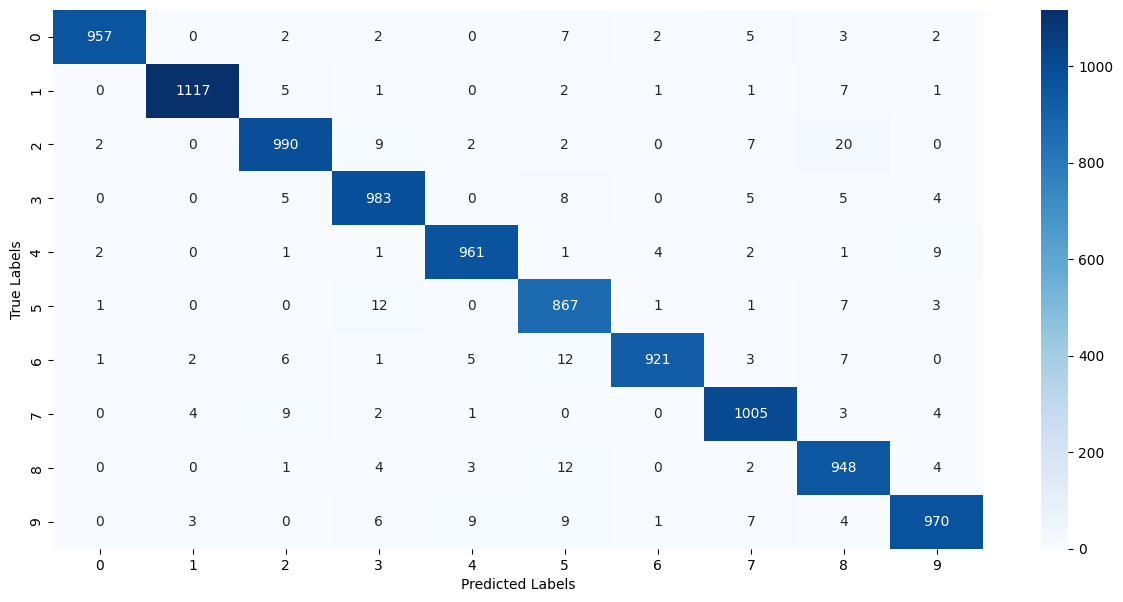

In [20]:
#constructing heatmap for confusion matrix

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

If we consider y=0 and x=3 , it gives result  as 0 which means that no True label as 0 is Predicted as 3 , similarly for others

Making a Predictive System

In [26]:
input_image_path='MNIST_digit.png'

In [27]:
input_image=cv2.imread(input_image_path)

In [28]:
print(input_image)           #converted into numpy array

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


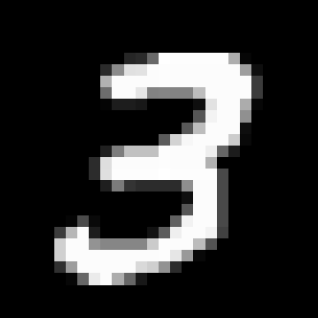

In [29]:
cv2_imshow(input_image)

In [30]:
input_image.shape                 #RGB image and not Grayscale image

(318, 318, 3)

In [31]:
#converting RGB image to Grayscale image

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape                   #resizing of image is required

(318, 318)

In [32]:
input_image_resized=cv2.resize(grayscale,(28,28))

In [33]:
input_image_resized.shape

(28, 28)

In [34]:
input_image_resized=input_image_resized/255

In [35]:
#reshaping to tell the model that only one image is used

input_reshaped=np.reshape(input_image_resized, [1,28,28])       #one image therefore [1,28,28]. For two RGB images [2,28,28,3]

In [36]:
input_prediction=model.predict(input_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 24ms/step
[[9.8450514e-10 3.2680008e-01 2.1750262e-02 1.0000000e+00 7.4552354e-08
  9.9493659e-01 5.0458729e-18 2.8366160e-02 9.5812362e-01 8.4607512e-01]]


In [37]:
input_prediction_label=np.argmax(input_prediction)
print('The Handwritten Digit is recognised as:' , input_prediction_label)

The Handwritten Digit is recognised as: 3
